In [1]:
import pandas as pd 
import numpy as np 
import bokeh
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",35)

In [2]:
data = pd.read_csv('../Data/form/form_0.csv')
data.head()
#data.drop(columns = ['q29','q30','q31','Unnamed: 32','Unnamed: 33'], inplace = True)
data.head()
data = data.set_index('Id Number')

In [3]:
import random

lst = []
for x in range(250): 
    if x< 50: 
        lst.append('Freelancer')
    if 50<=x<100: 
        lst.append('Part-Time')
    elif 100<x<250:
        lst.append('Full-Time')

kind_job = random.sample(lst, len(lst))

len(kind_job)
data['q10'] = pd.Series(kind_job)
data.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26,q27,q28
Id Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,Full-Time,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,Freelancer,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,Full-Time,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,Freelancer,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,Freelancer,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [4]:
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import bernoulli

data['q11'] = norm.rvs(loc = 1046, scale = 300, size = 249)
data['q12'] = norm.rvs(loc = 1274, scale = 300, size = 249)
data['q11']

# pordata 

Id Number
1      1221.708959
2      1273.723749
3      1056.029641
4       687.249528
5       815.990112
          ...     
245    1012.549831
246     947.756443
247     961.283457
248    1462.329461
249     905.809182
Name: q11, Length: 249, dtype: float64

In [5]:
""" data['q12'] = (data['q10']-data['q11'])/data['q10']

data.rename(columns= {'q9':'job_type','q10':'your_salary','q11':'male_salary','q12':'perceived_gap'}, inplace = True)
data.head()

#calculated """

" data['q12'] = (data['q10']-data['q11'])/data['q10']\n\ndata.rename(columns= {'q9':'job_type','q10':'your_salary','q11':'male_salary','q12':'perceived_gap'}, inplace = True)\ndata.head()\n\n#calculated "

In [6]:
data.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26,q27,q28
Id Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,Full-Time,1221.708959,1272.996459,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,Freelancer,1273.723749,1216.643263,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,Full-Time,1056.029641,1072.120144,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,Freelancer,687.249528,1753.700182,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,Freelancer,815.990112,1528.311820,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [7]:
data['q13'] = norm.rvs(loc = 0.4565, scale = 0.14, size = 249)
data.rename(columns= {'q13':'perc_women'}, inplace = True)
data.head()

# trading economics

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,perc_women,q14,q15,q16,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26,q27,q28
Id Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,Full-Time,1221.708959,1272.996459,0.675041,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,Freelancer,1273.723749,1216.643263,0.362727,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,Full-Time,1056.029641,1072.120144,0.259481,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,Freelancer,687.249528,1753.700182,0.464006,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,Freelancer,815.990112,1528.311820,0.137221,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


(array([100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 149.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

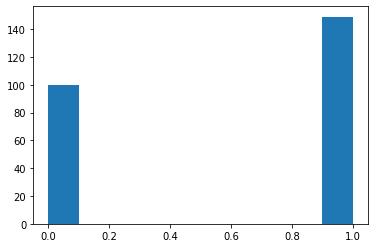

In [8]:
# Generating random variables
binomial = bernoulli.rvs(0.6, size = 249)
plt.hist(binomial)


#data.rename(columns= {'q13':'perc_women'}, inplace = True)
#data.head()


In [9]:
data['q14'] = norm.rvs(loc = 0.10, scale = 0.02, size = 249)

#data.rename(columns= {'q14':'perc_women_exec'}, inplace = True)
data.head()

#Eurostat

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,perc_women,q14,q15,q16,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26,q27,q28
Id Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,Full-Time,1221.708959,1272.996459,0.675041,0.105892,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,Freelancer,1273.723749,1216.643263,0.362727,0.119133,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,Full-Time,1056.029641,1072.120144,0.259481,0.110292,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,Freelancer,687.249528,1753.700182,0.464006,0.096182,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,Freelancer,815.990112,1528.311820,0.137221,0.111282,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [10]:
data['q15'] = norm.rvs(loc = 0.22, scale = 0.06, size = 249)

#data.rename(columns= {'q15':'perc_women_manag'}, inplace = True)
data.head()

#Eurostat

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,perc_women,q14,q15,q16,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26,q27,q28
Id Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,Full-Time,1221.708959,1272.996459,0.675041,0.105892,0.183591,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,Freelancer,1273.723749,1216.643263,0.362727,0.119133,0.225355,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,Full-Time,1056.029641,1072.120144,0.259481,0.110292,0.250302,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,Freelancer,687.249528,1753.700182,0.464006,0.096182,0.281607,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,Freelancer,815.990112,1528.311820,0.137221,0.111282,0.237393,1,1,1,1,1,1,1,1,1,1,1,1,1


In [11]:
data['q16'] = 1-data['q15']-data['q14']


#data.rename(columns= {'q16':'perc_women_other'}, inplace = True)
data.head()

# Maybe we need to take this out - doesn't add information. 


,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,perc_women,q14,q15,q16,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26,q27,q28
Id Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,Full-Time,1221.708959,1272.996459,0.675041,0.105892,0.183591,0.710517,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,Freelancer,1273.723749,1216.643263,0.362727,0.119133,0.225355,0.655512,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,Full-Time,1056.029641,1072.120144,0.259481,0.110292,0.250302,0.639406,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,Freelancer,687.249528,1753.700182,0.464006,0.096182,0.281607,0.622211,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,Freelancer,815.990112,1528.311820,0.137221,0.111282,0.237393,0.651325,1,1,1,1,1,1,1,1,1,1,1,1


In [12]:
data['q17'] = bernoulli.rvs(0.078, size = 249)

#data.rename(columns= {'q17':'admin_gender_strat'}, inplace = True)
data.head()

# estimated from Australian Model 

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,perc_women,q14,q15,q16,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26,q27,q28
Id Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,Full-Time,1221.708959,1272.996459,0.675041,0.105892,0.183591,0.710517,0,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,Freelancer,1273.723749,1216.643263,0.362727,0.119133,0.225355,0.655512,0,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,Full-Time,1056.029641,1072.120144,0.259481,0.110292,0.250302,0.639406,0,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,Freelancer,687.249528,1753.700182,0.464006,0.096182,0.281607,0.622211,0,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,Freelancer,815.990112,1528.311820,0.137221,0.111282,0.237393,0.651325,0,1,1,1,1,1,1,1,1,1,1,1


In [13]:
data['q18'] = bernoulli.rvs(0.4, size = 249)

#data.rename(columns= {'q18':'w_promotion_as_likely'}, inplace = True)
data.head()


# According to Mcckinsey, women 15 less likely to get promoted. 

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,perc_women,q14,q15,q16,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26,q27,q28
Id Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,Full-Time,1221.708959,1272.996459,0.675041,0.105892,0.183591,0.710517,0,0,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,Freelancer,1273.723749,1216.643263,0.362727,0.119133,0.225355,0.655512,0,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,Full-Time,1056.029641,1072.120144,0.259481,0.110292,0.250302,0.639406,0,0,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,Freelancer,687.249528,1753.700182,0.464006,0.096182,0.281607,0.622211,0,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,Freelancer,815.990112,1528.311820,0.137221,0.111282,0.237393,0.651325,0,0,1,1,1,1,1,1,1,1,1,1


In [14]:
data['q19'] = bernoulli.rvs(0.6, size = 249)

#data.rename(columns= {'q19':'w_resignation_as_likely'}, inplace = True)
data.head()

# Forbes 
# Women are more likely to resign, 31% vs 24%, even bigger at the top level, 24% vs 7%




,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,perc_women,q14,q15,q16,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26,q27,q28
Id Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,Full-Time,1221.708959,1272.996459,0.675041,0.105892,0.183591,0.710517,0,0,0,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,Freelancer,1273.723749,1216.643263,0.362727,0.119133,0.225355,0.655512,0,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,Full-Time,1056.029641,1072.120144,0.259481,0.110292,0.250302,0.639406,0,0,0,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,Freelancer,687.249528,1753.700182,0.464006,0.096182,0.281607,0.622211,0,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,Freelancer,815.990112,1528.311820,0.137221,0.111282,0.237393,0.651325,0,0,1,1,1,1,1,1,1,1,1,1


In [15]:
data['q20'] = bernoulli.rvs(0.4, size = 249)

#data.rename(columns= {'q20':'w_fired_as_likely'}, inplace = True)
data.head()

# Fortune -45% more likely to get fired 

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,perc_women,q14,q15,q16,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26,q27,q28
Id Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,Full-Time,1221.708959,1272.996459,0.675041,0.105892,0.183591,0.710517,0,0,0,0,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,Freelancer,1273.723749,1216.643263,0.362727,0.119133,0.225355,0.655512,0,1,1,0,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,Full-Time,1056.029641,1072.120144,0.259481,0.110292,0.250302,0.639406,0,0,0,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,Freelancer,687.249528,1753.700182,0.464006,0.096182,0.281607,0.622211,0,1,1,0,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,Freelancer,815.990112,1528.311820,0.137221,0.111282,0.237393,0.651325,0,0,1,0,1,1,1,1,1,1,1,1


In [16]:
data['q21'] = bernoulli.rvs(0.4, size = 249)

#data.rename(columns= {'q21':'organization_concerned'}, inplace = True)
data.head()

# Women 3 times more likely 
# Data from Cnbc poll
# https://www.cnbc.com/2017/12/19/one-fifth-of-american-adults-have-been-sexually-harassed-at-work.html

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,perc_women,q14,q15,q16,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26,q27,q28
Id Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,Full-Time,1221.708959,1272.996459,0.675041,0.105892,0.183591,0.710517,0,0,0,0,0,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,Freelancer,1273.723749,1216.643263,0.362727,0.119133,0.225355,0.655512,0,1,1,0,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,Full-Time,1056.029641,1072.120144,0.259481,0.110292,0.250302,0.639406,0,0,0,1,0,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,Freelancer,687.249528,1753.700182,0.464006,0.096182,0.281607,0.622211,0,1,1,0,0,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,Freelancer,815.990112,1528.311820,0.137221,0.111282,0.237393,0.651325,0,0,1,0,1,1,1,1,1,1,1,1


In [17]:
data['q22'] = bernoulli.rvs(0.2, size = 249)

#data.rename(columns= {'q22':'organization_proactive_gi'}, inplace = True)
data.head()




,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,perc_women,q14,q15,q16,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26,q27,q28
Id Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,Full-Time,1221.708959,1272.996459,0.675041,0.105892,0.183591,0.710517,0,0,0,0,0,0,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,Freelancer,1273.723749,1216.643263,0.362727,0.119133,0.225355,0.655512,0,1,1,0,1,0,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,Full-Time,1056.029641,1072.120144,0.259481,0.110292,0.250302,0.639406,0,0,0,1,0,0,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,Freelancer,687.249528,1753.700182,0.464006,0.096182,0.281607,0.622211,0,1,1,0,0,0,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,Freelancer,815.990112,1528.311820,0.137221,0.111282,0.237393,0.651325,0,0,1,0,1,0,1,1,1,1,1,1


In [18]:
data['q23'] = bernoulli.rvs(0.7, size = 249)

#data.rename(columns= {'q23':'parental_leave'}, inplace = True)
data.head()


,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,perc_women,q14,q15,q16,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26,q27,q28
Id Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,Full-Time,1221.708959,1272.996459,0.675041,0.105892,0.183591,0.710517,0,0,0,0,0,0,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,Freelancer,1273.723749,1216.643263,0.362727,0.119133,0.225355,0.655512,0,1,1,0,1,0,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,Full-Time,1056.029641,1072.120144,0.259481,0.110292,0.250302,0.639406,0,0,0,1,0,0,0,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,Freelancer,687.249528,1753.700182,0.464006,0.096182,0.281607,0.622211,0,1,1,0,0,0,0,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,Freelancer,815.990112,1528.311820,0.137221,0.111282,0.237393,0.651325,0,0,1,0,1,0,1,1,1,1,1,1


In [19]:
data['q24'] = bernoulli.rvs(0.4, size = 249)

#data.rename(columns= {'q24':'child_penalty'}, inplace = True)
data.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,perc_women,q14,q15,q16,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26,q27,q28
Id Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,Full-Time,1221.708959,1272.996459,0.675041,0.105892,0.183591,0.710517,0,0,0,0,0,0,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,Freelancer,1273.723749,1216.643263,0.362727,0.119133,0.225355,0.655512,0,1,1,0,1,0,1,0,1,1,1,1
3,1,1,1,1,1,1,1,1,1,Full-Time,1056.029641,1072.120144,0.259481,0.110292,0.250302,0.639406,0,0,0,1,0,0,0,0,1,1,1,1
4,1,1,1,1,1,1,1,1,1,Freelancer,687.249528,1753.700182,0.464006,0.096182,0.281607,0.622211,0,1,1,0,0,0,0,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,Freelancer,815.990112,1528.311820,0.137221,0.111282,0.237393,0.651325,0,0,1,0,1,0,1,0,1,1,1,1


In [ ]:
data['q25'] = bernoulli.rvs(0.3, size = 249)

#data.rename(columns= {'q25':'work_harassment'}, inplace = True)
data.head()

# according to CNBC's poll 

In [ ]:
data['q26'] = bernoulli.rvs(0.25, size = 249)

data.rename(columns= {'q26':'company_harassment_procedures'}, inplace = True)
data.head()

In [ ]:
data['q27'] = bernoulli.rvs(0.4, size = 249)

data.rename(columns= {'q27':'company_support_domestic_abuse'}, inplace = True)
data.head()


In [ ]:
data.columns #to_json('final_test.json')

In [ ]:
data.drop(columns = 'q28', inplace = True ) 


In [ ]:
data.to_json('final_test.json')